In [1]:
## Importo librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Comienzo leyendo el archimo "udemy_courses"
coursera= pd.read_csv('Coursera_courses.csv')

In [3]:
## Visualizo las primeras 5 lineas, para tener un panorama rápido de la informacion
coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [4]:
## veo sus dimensiones
coursera.shape

(623, 4)

In [5]:
## Voy a tener mas informacion del dataset
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [6]:
## Aca se observa que University of Pennsylvania es la que mas cursos tiene, aparece 43 veces
coursera.describe(exclude=[np.number])

,name,institution,course_url,course_id
count,623,623,623,623
unique,622,134,623,623
top,Introduction to Psychology,University of Pennsylvania,https://www.coursera.org/learn/machine-learning,machine-learning
freq,2,43,1,1


In [7]:
## Voy a chequear la cantidad de nulos; observo que el dataset no tiene
coursera.isnull().sum()

name           0
institution    0
course_url     0
course_id      0
dtype: int64

In [8]:
## Ahora chequeo los duplicados
coursera.duplicated().sum()

0

In [9]:
## voy a corroborar con la columna 'course_url' para ver si hay duplicados
coursera['course_url'].duplicated().sum()

0

In [11]:
coursera.institution.unique()

array(['Stanford University', 'University of Alberta', 'Yale University',
       'Google', 'Google - Spectrum Sharing', 'University of Michigan',
       'DeepLearning.AI', 'Johns Hopkins University', 'IBM',
       'University of Virginia', 'University of California, Irvine',
       'London Business School', 'Macquarie University',
       'University of Colorado Boulder',
       'University of California San Diego', 'Google Cloud',
       'University of Pennsylvania', 'Università Bocconi',
       'Yonsei University', 'ESSEC Business School',
       'California Institute of the Arts',
       'Universitat Autònoma de Barcelona', 'Wesleyan University',
       'Atlassian', 'Georgia Institute of Technology', 'GitLab',
       'Imperial College London', 'University of Toronto',
       'University of London', 'University of California, Davis',
       'Duke University', 'The University of Chicago', 'Facebook',
       'West Virginia University', 'University of Pittsburgh',
       'The University 

In [10]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words_no = set(stopwords.words('english')+ ["using","Using", "learn", "tough", "Stanford", "Introduction", "First", "Step","Skills", "Essentials", "Crash", "mental", "tools", "master", "Everyone","World","tuning","Networks","Structures","Well", "Optimization","Infraestructure", "Healt","Fundamentals", "Becoming", "Beginners","subjects", "Programming", "Getting", "Started", "help","Powerfull","Everybody", "Aprendiendo" ,"Infraestructure","Platform", "Punctuation"])

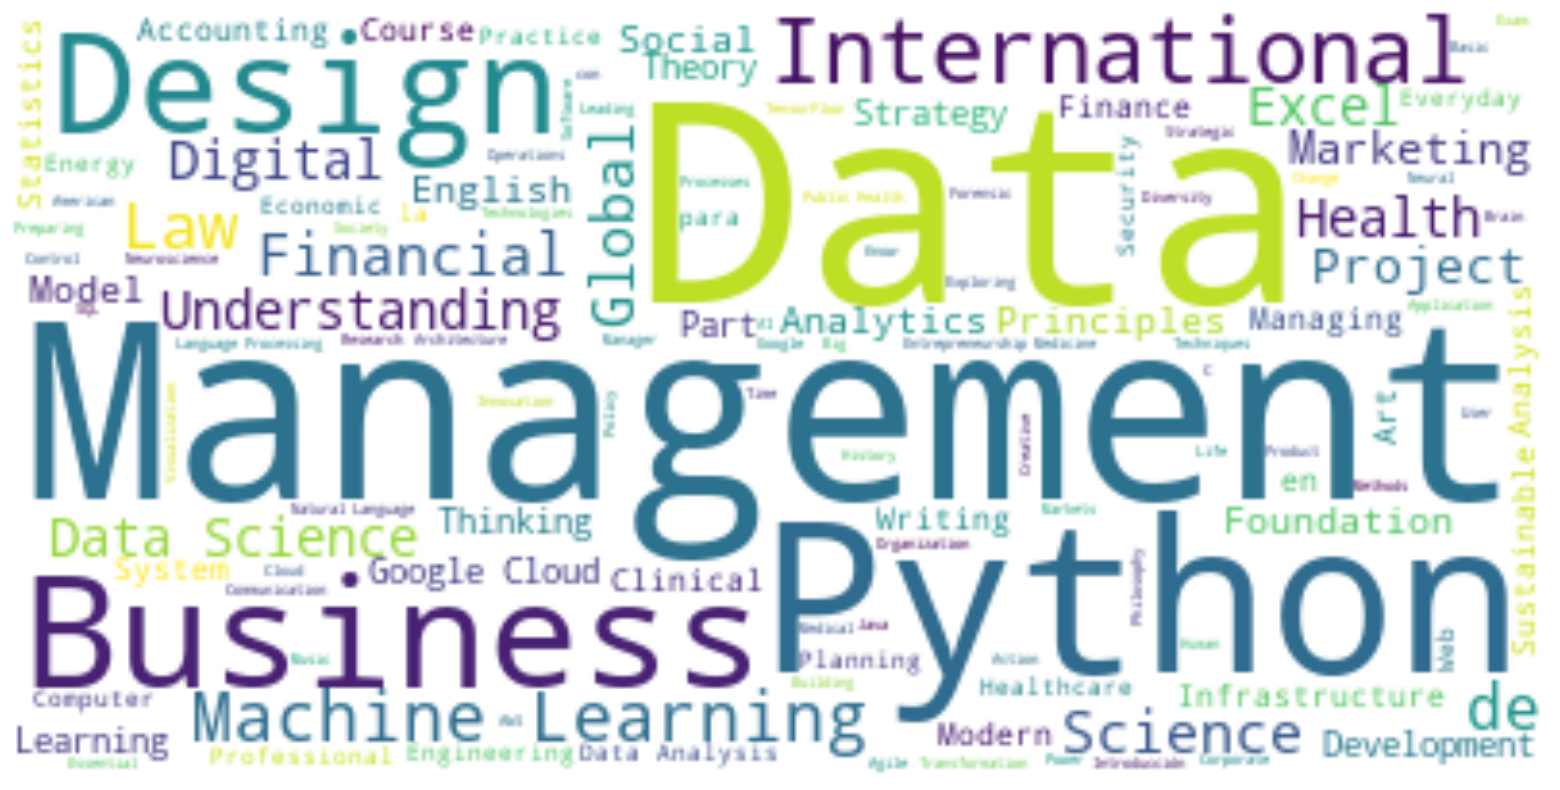

In [12]:
## Realizo un WordCloud para visualizar la importancia de las palabras en el nombre del curso

stopwords = stop_words_no

description_plain_text = coursera['name'].str.cat(sep=' ')
cloud_prueba = WordCloud(background_color = "white",stopwords = stopwords).generate(description_plain_text)
plt.figure(figsize=(20,10))
plt.imshow(cloud_prueba, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
## En este caso observo que las palabras mas importantes en el nombre de los cursos (y por ende los mas busacsdos seguramente) son:
## Data, Management, Business, Python, Machine learning

## es decir que son hoy los cursos mas tomados y por eso aparecen en el listado

In [12]:
## voy a agregar una columna que me servira para el analisis
coursera['plataforma']= 'coursera'

In [13]:
coursera.head()

,name,institution,course_url,course_id,plataforma
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,coursera
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,coursera
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,coursera
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,coursera
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,coursera


In [14]:
## exporto a csv
coursera.to_csv ('coursera_limpio.csv', index= False)